# DMBDA Project: Supervised mining (Part 1)
## Group No.: 6

- Winnie Kadzo Yaa
- God'spower Emmanuel Okon
- **Sandra Marion kam Tsemo**
- Amisi Fikirini
- Elie Rene Mulamba
- Kalidou Aliou Ball


### INTRODUCTION

Ce projet s'inscrit dans le cadre de fin de cours de Data mining. Le problème posé est d'effectuer une classification supervisée dans le but de classer les chiffres manuscrits après avoir effectuer une analyse exploratoire. Il s’agit de prédire la variable CLASS (qu'on a déjà créée) dont la valeur est 0, 1, … ou 9 correspondant au chiffre manuscrit indiqué sur l’image. 

In [ ]:
import numpy as np
import pandas as pd
from pandas import *
from sklearn.model_selection import train_test_split
import keras 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [ ]:
fac=pd.read_table('mfeat-fac',skipinitialspace=True,sep=' ',header=None)
fou=pd.read_table('mfeat-fou',skipinitialspace=True,sep=' ',header=None)
kar=pd.read_table('mfeat-kar',skipinitialspace=True,sep=' ',header=None)
mor=pd.read_table('mfeat-mor',skipinitialspace=True,sep=' ',header=None)
pix=pd.read_table('mfeat-pix',skipinitialspace=True,sep=' ',header=None)
zer=pd.read_table('mfeat-zer',skipinitialspace=True,sep=' ',header=None)

### Création de la base de données

In [ ]:
data=pd.concat([fac,fou,kar,mor,pix,zer],axis=1)

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


### Création des noms des variables 

In [ ]:
col=[]
for i in range(1,650):
    col.append('V{}'.format(i))


In [ ]:
data.columns=col

In [ ]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V640,V641,V642,V643,V644,V645,V646,V647,V648,V649
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 649 entries, V1 to V649
dtypes: float64(193), int64(456)
memory usage: 9.9 MB


In [ ]:
data.describe().mean().T.head(10)

V1     470.728369
V2     506.894011
V3     872.589509
V4     846.689096
V5     732.487577
V6     786.193858
V7     266.475195
V8     265.090599
V9     263.530777
V10    257.142302
dtype: float64

### Création de la variable Y

In [ ]:
n=0
m=200
for i in range(10):
    if m<=2000:
        data.loc[n:m,'Target']=i
        
    n+=200
    m+=200

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V641,V642,V643,V644,V645,V646,V647,V648,V649,Target
0,98,236,531,673,607,647,2,9,3,6,...,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457,0.0
1,121,193,607,611,585,665,7,9,2,4,...,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567,0.0
2,115,141,590,605,557,627,12,6,3,3,...,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691,0.0
3,90,122,627,692,607,642,0,6,4,5,...,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814,0.0
4,157,167,681,666,587,666,8,6,1,4,...,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513,0.0


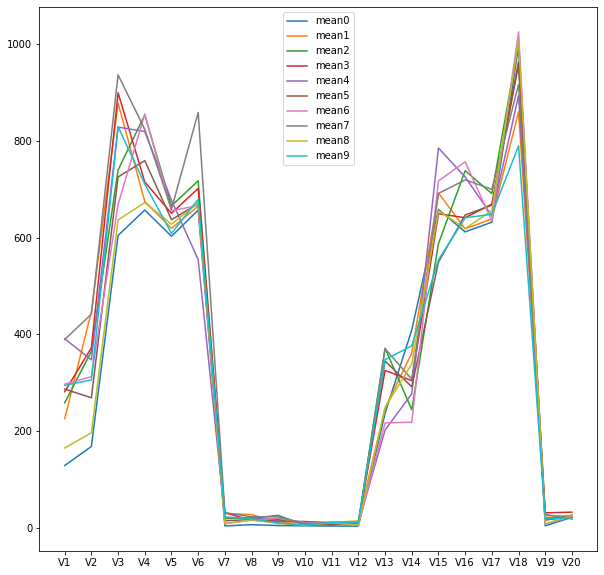

In [ ]:
plt.figure(1,figsize=(10,10))
for i in range(10):
    plt.plot(data[data['Target']==i].describe().T['mean'].head(20), label=('mean{}'.format(i)))
    plt.legend()

On constate que les moyennes varient presque de la même façon pour chaque classe. 

In [ ]:
correlation = data.corr().round(1)
correlation

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V641,V642,V643,V644,V645,V646,V647,V648,V649,Target
V1,1.0,0.5,0.6,0.5,0.3,0.2,0.5,0.3,0.5,0.4,...,0.1,0.5,0.1,-0.1,-0.4,0.1,0.6,-0.1,-0.7,0.3
V2,0.5,1.0,0.6,0.4,0.3,0.3,0.8,0.6,0.5,0.5,...,0.4,0.4,0.2,0.2,-0.1,0.4,0.4,0.2,-0.4,-0.1
V3,0.6,0.6,1.0,-0.1,0.1,0.3,0.9,0.3,0.1,0.4,...,0.4,0.5,0.1,0.1,-0.2,0.4,0.5,0.1,-0.5,0.1
V4,0.5,0.4,-0.1,1.0,0.5,0.1,-0.0,0.3,0.8,0.1,...,-0.1,0.1,0.4,0.2,-0.3,-0.1,0.2,0.2,-0.5,0.1
V5,0.3,0.3,0.1,0.5,1.0,0.1,0.1,0.2,0.5,0.2,...,-0.1,0.2,0.2,0.3,-0.3,-0.1,0.2,0.3,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V646,0.1,0.4,0.4,-0.1,-0.1,-0.1,0.4,0.4,-0.0,0.3,...,1.0,0.3,-0.2,-0.2,0.3,1.0,0.3,-0.2,0.1,-0.2
V647,0.6,0.4,0.5,0.2,0.2,0.2,0.4,0.2,0.1,0.2,...,0.3,0.9,-0.1,-0.2,-0.1,0.3,1.0,-0.2,-0.3,0.3
V648,-0.1,0.2,0.1,0.2,0.3,0.6,0.1,0.1,0.3,-0.1,...,-0.2,-0.2,0.3,1.0,-0.4,-0.2,-0.2,1.0,-0.1,-0.1
V649,-0.7,-0.4,-0.5,-0.5,-0.3,-0.4,-0.4,-0.0,-0.5,-0.2,...,0.1,-0.2,-0.2,-0.0,0.8,0.1,-0.3,-0.1,1.0,-0.2


<function matplotlib.pyplot.show(close=None, block=None)>

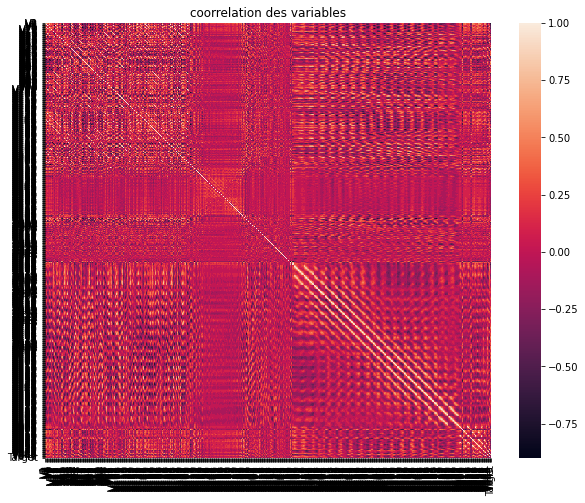

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,8))
plt.title('coorrelation des variables')
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.show

On constate qu'il n'y a pas de forte correlation entre les variables, par consequent il ne risque pas d'avoir un problème de colinéarité entre les variables.

### Séparation des variables X , Y et normalisation de X

In [ ]:
Z=data.iloc[:,:data.shape[1]-1]
Y=data['Target']
X=(Z-Z.mean())/Z.std()

### Récupération de  X pour chaque classe

In [ ]:
n=0
m=200
x=[]
for i in range(10):
    if m<=2000:
        x.append(X.iloc[n:m,:])
        
    n+=200
    m+=200

### Récupération de la variable Target pour chaque classe

In [ ]:
n=0
m=200
y=[]
for i in range(10):
    if m<=2000:
        y.append(Y.iloc[n:m])
        
    n+=200
    m+=200

In [ ]:
x[0].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V640,V641,V642,V643,V644,V645,V646,V647,V648,V649
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.862236,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.507767,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.958162,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.009379,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.284989,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833


In [ ]:
y[0].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [ ]:
y[0].plot

### Création des données d'entrainement et de test pour chacune des 10 classes

In [ ]:
x_train=[];y_train=[];x_tt=[];y_tt=[]

In [ ]:
for i in range(10):
    p=train_test_split(x[i],y[i],test_size=0.3,random_state=42)
    x_train.append(p[0])
    x_tt.append(p[1])
    y_train.append(p[2])
    y_tt.append(p[3])

### Création de données d'entrainement globales

In [ ]:
X_train=pd.concat(x_train)
Y_train=pd.concat(y_train)


In [ ]:
X_train.shape

(1400, 649)

In [ ]:
Y_train.shape

(1400,)

### Création de données test et de validation globales

In [ ]:
X_test_val=pd.concat(x_tt)
Y_test_val=pd.concat(y_tt)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, 
        test_size=0.2, shuffle=False)


In [ ]:
X_test.shape

(480, 649)

In [ ]:
X_val.shape

(120, 649)

### Model de Réseaux de Neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.callbacks import EarlyStopping

In [ ]:
network=Sequential()
network.add(Dense(100,activation = 'relu', input_shape=(649,))) 
network.add(Dense(150,activation = 'relu'))   # couche cachée
network.add(Dense(10,activation = 'sigmoid'))   

In [ ]:
network.compile(optimizer='adam',                # mise à jour des poids de connection
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])
network.fit(X_train, Y_train, batch_size=10, epochs=80, validation_data=(X_val,Y_val))

Epoch 1/80
140/140 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5879 - val_accuracy: 0.9500
Epoch 2/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5879 - val_accuracy: 0.9500
Epoch 3/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5879 - val_accuracy: 0.9500
Epoch 4/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5878 - val_accuracy: 0.9500
Epoch 5/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5879 - val_accuracy: 0.9500
Epoch 6/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5878 - val_accuracy: 0.9500
Epoch 7/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5878 -

Epoch 57/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.9500
Epoch 58/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.9500
Epoch 59/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.9500
Epoch 60/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.9500
Epoch 61/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.9500
Epoch 62/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.9500
Epoch 63/80
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [ ]:
loss, score=network.evaluate(X_test,Y_test)
print('score:', score)

15/15 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9854
score: 0.9854166507720947


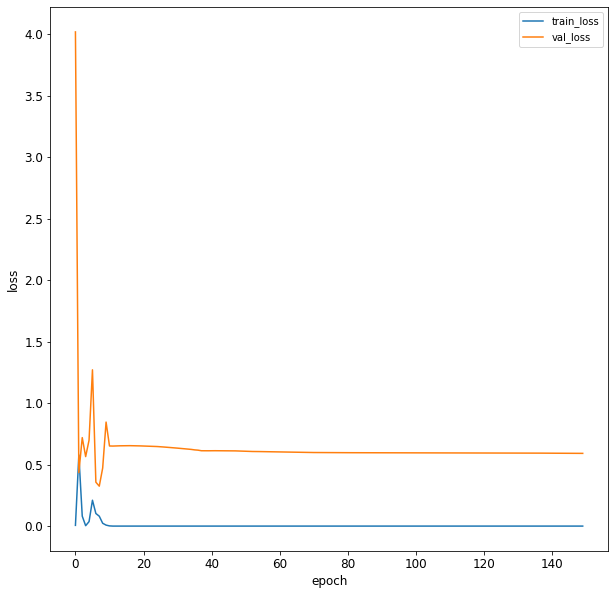

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':model.history['loss'], 'val_loss':model.history['val_loss']})
plot_df.plot(logy=False,figsize=(10,10),fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
predict_x=network.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
eval_df=pd.DataFrame(classes_x)

In [ ]:
classes_x.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [ ]:
#eval_df

In [ ]:
D=pd.concat([pd.DataFrame(Y_test.values),eval_df],axis=1)
D.columns={"Actual","Predict"}
D

,Actual,Predict
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
475,7.0,7
476,7.0,7
477,7.0,7
478,7.0,7


Evolution des density des predicts et Trues values

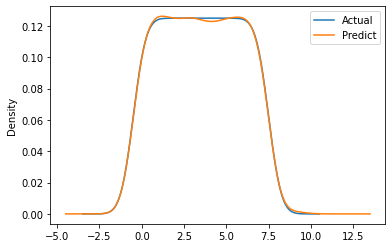

In [ ]:
D.plot.density()
plt.show()

### Methode Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1=RandomForestClassifier()
model1.fit(X_train,Y_train)
pred1=model1.predict(X_test)
accuracy_score(Y_test,pred1)

0.9875

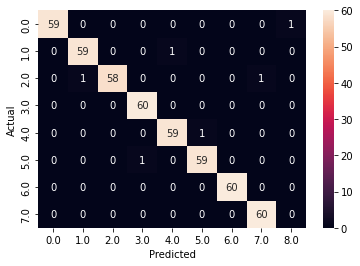

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        60
         1.0       0.98      0.98      0.98        60
         2.0       1.00      0.97      0.98        60
         3.0       0.98      1.00      0.99        60
         4.0       0.98      0.98      0.98        60
         5.0       0.98      0.98      0.98        60
         6.0       1.00      1.00      1.00        60
         7.0       0.98      1.00      0.99        60
         8.0       0.00      0.00      0.00         0

    accuracy                           0.99       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.99      0.99      0.99       480



/home/mulamba/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mulamba/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mulamba/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':pred1}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, pred1))

Dans ce projet nous avons présenté des cas d'étude en utulisant les modèles de classification: Reseau de Neurones, LDA,KNN et Random Forest. Tous ces modèles semblent donner de bons score de 0.99 environs. Notons dans le cas de l'analyse discriminante le score élévé ne permet de conclure. C'est pour cela que l'exploration de d'autres méthodes viennent confirmer les résultats du modèle de l'analyse discriminante. Aussi lorsqu'on observe la densité entre les valeurs prédictes et les vraies valeurs on remarque une allure presque identique. Avec par exemple la methode des kNN, on a une performance du modèle pour k=6 ou 8 voisins.
